In [1]:
from dask.distributed import Client
# starting the dask client
# dask client will perform calculations 
# with compands like .compute() and .collect() we send computations to the client
client = Client(n_workers=8)

In [2]:
# we can inspect the client at the url below
# we have to allow dask access to the newtork (on public and private networks)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 8,Total memory: 15.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50836,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.81 GiB
Comm: tcp://137.204.56.39:50909,Total threads: 1
Dashboard: http://137.204.56.39:50910/status,Memory: 1.98 GiB
Nanny: tcp://127.0.0.1:50846,


In [3]:
import dask

In [4]:
from time import sleep

# simulating expensive functions with sleep...
# NEVER use sleep in production! :)
# sleeps just does nothing for x seconds

#expensive increase
def inc(x):
    sleep(1)
    return x + 1

#expensive add
def add(x, y):
    sleep(1)
    return x + y

In [5]:
%%time
x = inc(1)
y = inc(2)
z = add(x, y)
print(type(z))

<class 'int'>
Wall time: 3.06 s


In [6]:
from dask import delayed

In [7]:
%%time
# We make our functions lazy:
# lazy functions are not executed untill needed
# this cell executes instantly - why?

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

# why is the type of z different than in the cell above?
print(type(z))

<class 'dask.delayed.Delayed'>
Wall time: 0 ns


In [8]:
%%time
z.compute() #actually running the computation

Wall time: 2.53 s


5

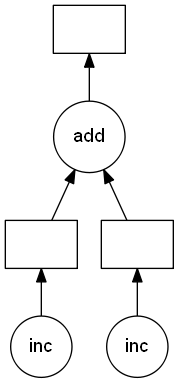

In [9]:
# Look at the task graph for `z`
z.visualize()

In [10]:
data = [i for i in range(5)]
data

[0, 1, 2, 3, 4]

In [11]:
%%time
r = sum([inc(i) for i in data])
r

Wall time: 5.06 s


15

In [12]:
# how do we make it paralel?

In [13]:
%%time
r.compute()

AttributeError: 'int' object has no attribute 'compute'

In [14]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [i for i in range(10)]

In [15]:
# delayed with controll sequences
results = []
for x in data:
    if is_even(x):  # even
        y = delayed(double)(x)
    else:          # odd
        y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)

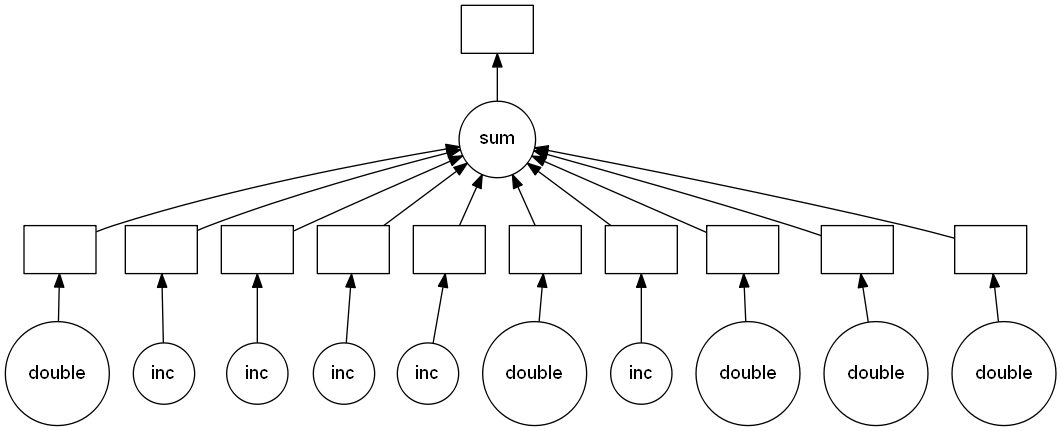

In [16]:
total.visualize()

In [17]:
total.compute()

70

In [18]:
results

[Delayed('double-4292fe9d-41f7-455d-96c0-a225bd674148'),
 Delayed('inc-8e2d0d88-8ae5-49db-a584-c0330c7f4595'),
 Delayed('double-bd08da6d-eb97-415e-8465-840d73ceac89'),
 Delayed('inc-b5cd379d-60ea-4bae-a484-d2692a1b2950'),
 Delayed('double-8097c149-e3bc-4b1e-a69a-88a54b550a1e'),
 Delayed('inc-9141f64d-2c6a-4904-8aa7-9482dd0fb6a0'),
 Delayed('double-252c6df4-2bf4-4924-93c8-d0f75ad6d2b2'),
 Delayed('inc-c3037fd6-aa37-4f87-ba07-08c9f30a2040'),
 Delayed('double-83a63c98-1081-46c4-8027-8a014b853904'),
 Delayed('inc-e51691ef-04dd-45f4-ad8e-9d064172e159')]

In [19]:
# very usefull: running all calcs in a list
dask.compute(*results)

(0, 2, 4, 4, 8, 6, 12, 8, 16, 10)

In [20]:
import pandas as pd
df = pd.read_csv('paws.csv')

In [21]:
df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [22]:
ddf = delayed(df)

In [23]:
ddf.groupby('Eyes')

Delayed('groupby-91d073f8-4ee9-4043-aee9-22897444579b')

In [24]:
%time
ddf.groupby('Eyes').compute() #what is the difference between the two?

Wall time: 0 ns


In [25]:
df.groupby('Eyes')

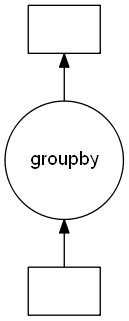

In [26]:
ddf.groupby('Eyes').visualize()

In [27]:
import random

In [28]:
# Monte Carlo integration
def under_f(a,b,f, A = 0, B = 1):
    x, y = random.random(), random.random()
    x, y = (b-a)*x + a, (B-A)*y + A
    return y <= f(x)


In [34]:
# make it parallel!
def MC_integrate(f, a,b, n_samples, A = 0, B = 1):
    r = [under_f(a,b,f,A,B) for i in range(n_samples)]
    count = sum(r)
    return ((b-a)*(B-A)*count)/(n_samples)

In [35]:
MC_integrate(lambda x: x*x, 0, 1, 10)

0.3

In [36]:
MC_integrate(lambda x: x*x, 0, 1, 1000).compute()

AttributeError: 'float' object has no attribute 'compute'

In [37]:
def under_f2(p,a,b,f, A = 0, B = 1):
  x, y = random.random(), random.random()
  x, y = (b-a)*x + a, (B-A)*y + A
  #print(x, y)
  return y <= f(x)

In [38]:
def under_n(N, B, f):
    assert N == len(B)
    var = [random.random() for _ in range(N)]
    var = [(B[i][1] - B[i][0])*var[i] + B[i][0] for i in range(len(B))]
    return var[-1] <= f(*var[:-1]) #* unpacks values in a list


In [39]:
under_n(3,[(0,1),(0,1), (0,1)], lambda x, y: x+y)

True

In [40]:
def MC_integrate_N(N, B, f, samples):
    #....
    area = [(B[i][1] - B[i][0]) for i in range(len(B))]
    a = 1
    for i in area: a = a*i
    return (a*count)/(samples)

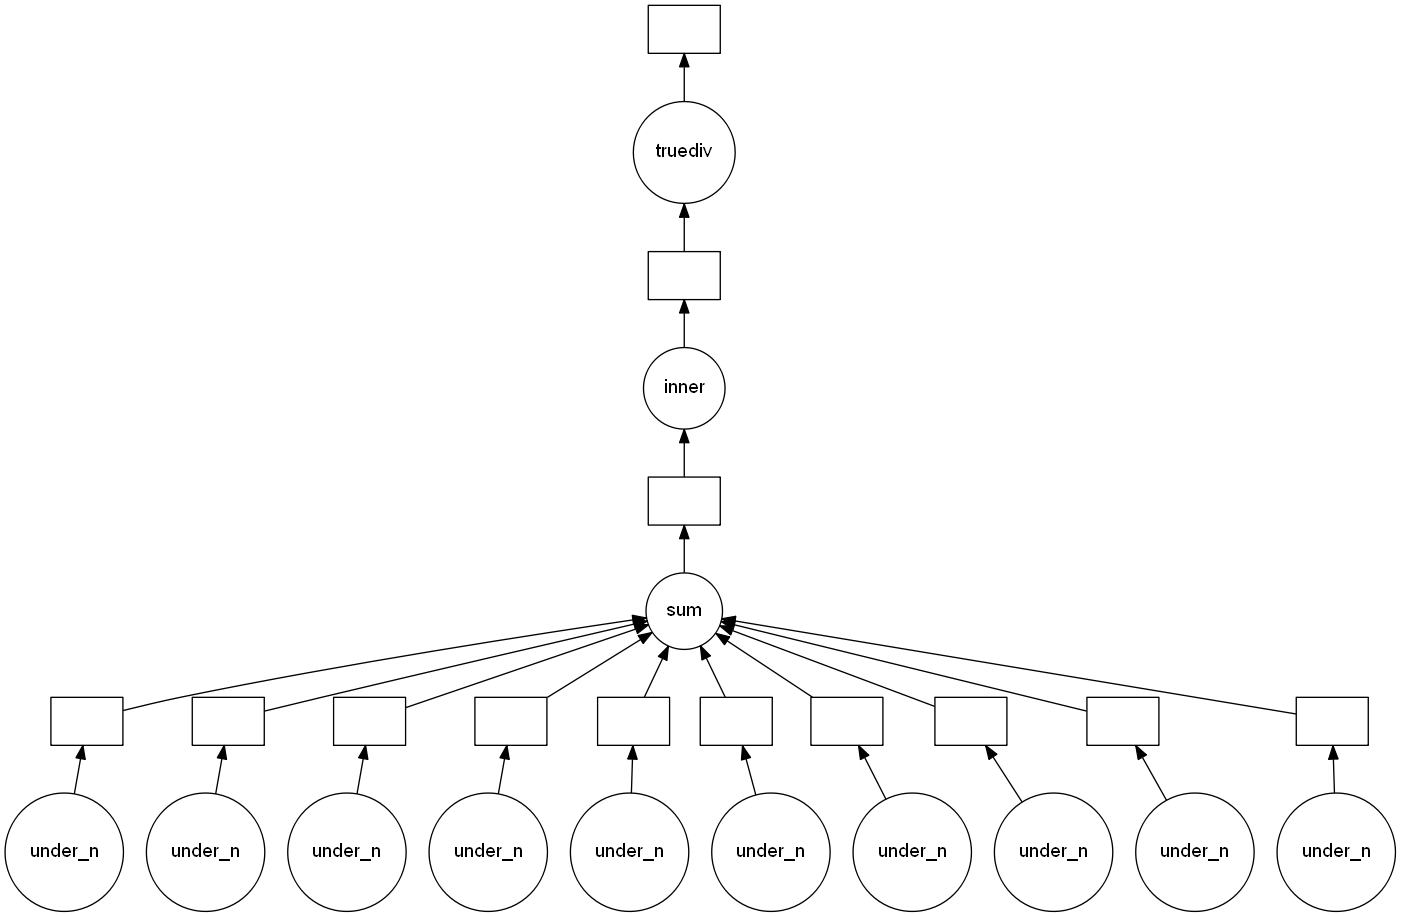

In [52]:
MC_integrate_N(3,[(0,1),(0,1), (0,1)], lambda x, y: x+y,10).visualize()

In [53]:
%%time
MC_integrate_N(3,[(0,1),(0,1), (0,1)], lambda x, y: x*y,100).compute()

Wall time: 155 ms


0.29